In [67]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph

In [68]:
## Helper fucntion for natural string formatting

def format_string(items: list[str]) -> str:
    """
    Convert list[str] to str in a natural formatting (comma and "and" in the right order)
    """
    if not items: 
        return ""
    if len(items) == 1: 
        return items[0]
    if len(items) == 2:
        return " and ".join(items)
    return ", ".join(items[:-1]) + f" and {items[-1]}"

In [69]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: List[str]
    final: str

In [70]:
def personalize_name_node(state: AgentState) -> AgentState:
    """
    Node that personalizes the name dynamically
    """

    state["name"] = state["name"]

    return state

In [71]:
def describe_age_node(state: AgentState) -> AgentState:
    """
    Node that describes the user's age
    """

    state["age"] = state["age"]

    return state

In [72]:
def list_user_skills_node(state: AgentState) -> AgentState:
    """
    List the user's skills
    """

    state["skills"] = state["skills"]

    return state

In [73]:
def finalize_output_node(state: AgentState) -> AgentState:
    """
    Finalize the output string, using all the updated states
    """

    skills = format_string(state["skills"])
    state["final"] = f"{state["name"]}, welcome to the system! You are {state["age"]} years old. You have skills in: {skills}"

    return state

In [74]:
graph = StateGraph(AgentState)

graph.add_node("name_node", personalize_name_node)
graph.add_node("age_node", describe_age_node)
graph.add_node("skills_node", list_user_skills_node) 
graph.add_node("final_node", finalize_output_node) 

graph.set_entry_point("name_node")

graph.add_edge("name_node", "age_node")
graph.add_edge("age_node", "skills_node")
graph.add_edge("skills_node", "final_node")

graph.set_finish_point("final_node")

app = graph.compile()

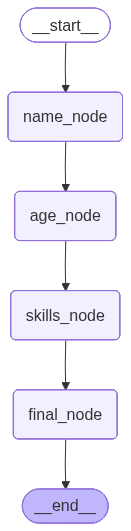

In [75]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [76]:
result = app.invoke(
    {
        "name": "Bob",
        "age": "32", 
        "skills": ["Python", "LangGraph", "RAG", "QLoRA", "Frontier Models Implementation", "HF"]
    }
)

result

{'name': 'Bob',
 'age': '32',
 'skills': ['Python',
  'LangGraph',
  'RAG',
  'QLoRA',
  'Frontier Models Implementation',
  'HF'],
 'final': 'Bob, welcome to the system! You are 32 years old. You have skills in: Python, LangGraph, RAG, QLoRA, Frontier Models Implementation and HF'}

In [77]:
print(result["final"])

Bob, welcome to the system! You are 32 years old. You have skills in: Python, LangGraph, RAG, QLoRA, Frontier Models Implementation and HF
